# Intel® Extension for Scikit-learn TSNE example

In [1]:
from timeit import default_timer as timer
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

### Generate the data 
Generate isotropic Gaussian blobs for clustering.
<br/>
With the number of samples: 20k<br/> 
Number of features: 100 <br/>
Number of blobs: 4 <br/>
Source: <br/>    
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html


In [2]:
x, y = make_blobs(n_samples=20000, centers=4, n_features=100, random_state=0)

### Patch original Scikit-learn with Intel® Extension for Scikit-learn
Intel® Extension for Scikit-learn (previously known as daal4py) contains drop-in replacement functionality for the stock Scikit-learn package. You can take advantage of the performance optimizations of Intel® Extension for Scikit-learn by adding just two lines of code before the usual Scikit-learn imports:

In [3]:
from sklearnex import patch_sklearn

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


Intel® Extension for Scikit-learn patching affects performance of specific Scikit-learn functionality. Refer to the [list of supported algorithms and parameters](https://uxlfoundation.github.io/scikit-learn-intelex/algorithms.html) for details. In cases when unsupported parameters are used, the package fallbacks into original Scikit-learn. If the patching does not cover your scenarios, [submit an issue on GitHub](https://github.com/uxlfoundation/scikit-learn-intelex/issues).

Training TSNE algorithm with Intel® Extension for Scikit-learn for generated dataset

In [4]:
from sklearn.manifold import TSNE

params = {"n_components": 2, "random_state": 42}
start = timer()
tsne = TSNE(**params)
embedding_intelex = tsne.fit_transform(x)
time_opt = timer() - start

print(f"Intel® extension for Scikit-learn time: {time_opt:.2f} s")
print(f"Intel® Extension for scikit-learn. Divergence: {tsne.kl_divergence_}")

Intel® extension for Scikit-learn time: 12.63 s
Intel® Extension for scikit-learn. Divergence: 4.289110606110757


  ### Train the same algorithm with original Scikit-learn
In order to cancel optimizations, we use *unpatch_sklearn* and reimport the class TSNE.

In [5]:
from sklearnex import unpatch_sklearn

unpatch_sklearn()

Training algorithm with original Scikit-learn library for generated dataset

In [6]:
from sklearn.manifold import TSNE

params = {"n_components": 2, "random_state": 42}
start = timer()
tsne = TSNE(**params)
embedding_original = tsne.fit_transform(x)
time_original = timer() - start

print(f"Original Scikit-learn time: {time_original:.2f} s")
print(f"Original Scikit-learn. Divergence: {tsne.kl_divergence_}")

Original Scikit-learn time: 37.66 s
Original Scikit-learn. Divergence: 4.2955403327941895


### Plot embeddings original scikit-learn and Intel® extension

In [7]:
colors = [int(m) for m in y]

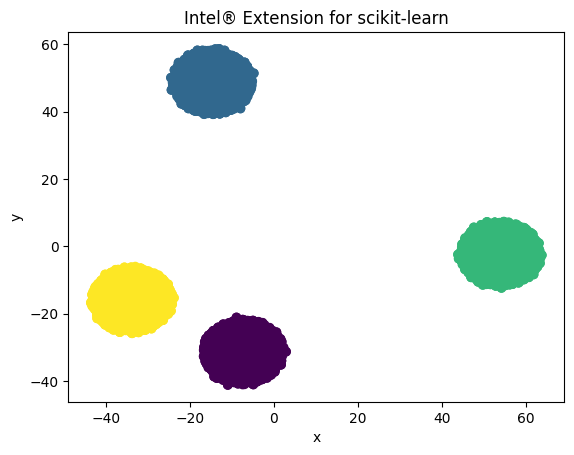

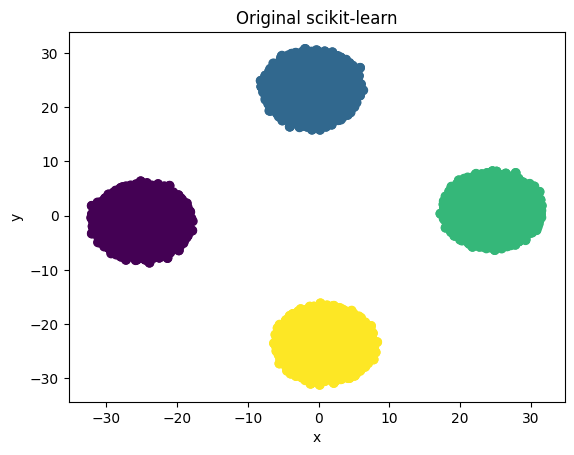

In [8]:
for emb, title in zip(
    [embedding_intelex, embedding_original],
    ["Intel® Extension for scikit-learn", "Original scikit-learn"],
):
    plt.scatter(emb[:, 0], emb[:, 1], c=colors)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [9]:
f"Speedup for this run: {(time_original/time_opt):.1f}"

'Speedup for this run: 3.0'